In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.utils import resample

In [2]:
conversion_data = pd.read_csv('/Users/baharsharafi/Documents/Insight\
/Data_Challenges/conversion_data.csv')

In [3]:
conversion_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# What do these columns look like?

In [5]:
countries = pd.unique(conversion_data.country)

In [8]:
conversion_data['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [9]:
conversion_data['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [10]:
conversion_data['total_pages_visited'].value_counts()

2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: total_pages_visited, dtype: int64

In [11]:
conversion_data['new_user'].value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [12]:
conversion_data['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

# What do the columns look like if we seperate by those who converted and those who did not?

In [13]:
convert_data = conversion_data[conversion_data['converted'] == 1]
nonconvert_data = conversion_data[conversion_data['converted'] == 0]

## By country:

In [14]:
{'convert':convert_data['country'].value_counts() , 'nonconvert': nonconvert_data['country'].value_counts()}

{'convert': US         6732
 UK         2550
 Germany     816
 China       102
 Name: country, dtype: int64, 'nonconvert': US         171360
 China       76500
 UK          45900
 Germany     12240
 Name: country, dtype: int64}

### Conversion rate by country:

In [15]:
convert_data['country'].value_counts()/conversion_data['country'].value_counts()

China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: country, dtype: float64

### Insight: Don't bother with selling in china!

## By source: 

In [21]:
convert_data['source'].value_counts()/conversion_data['source'].value_counts()

Seo       0.032895
Ads       0.034483
Direct    0.028169
Name: source, dtype: float64

### Insight: Not that different by source.

In [22]:
convert_data['source'].value_counts()/conversion_data['source'].value_counts()

Seo       0.032895
Ads       0.034483
Direct    0.028169
Name: source, dtype: float64

## By number of page visits: 

In [20]:
convert_data['total_pages_visited'].value_counts()/conversion_data['total_pages_visited'].value_counts()

1          NaN
2     0.000228
3     0.000251
4     0.000780
5     0.001570
6     0.003437
7     0.006769
8     0.015238
9     0.033067
10    0.061184
11    0.123471
12    0.244537
13    0.400825
14    0.587521
15    0.740377
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: total_pages_visited, dtype: float64

### Insight: The more pages you visit the more likely you are to convert. Makes sense. Perhaps you were more motivated to purchase to begin with? Or is it that if the website can engage you longer, you are more likely to buy?

## New or old user?

In [23]:
convert_data['new_user'].value_counts()/conversion_data['new_user'].value_counts()

0    0.072002
1    0.014021
Name: new_user, dtype: float64

### Insight: New users are less likely to convert!

## By age: 

In [27]:
# convert_data['age'].value_counts()/conversion_data['age'].value_counts()

### This is not particulalrly useful! Let's plot instead!

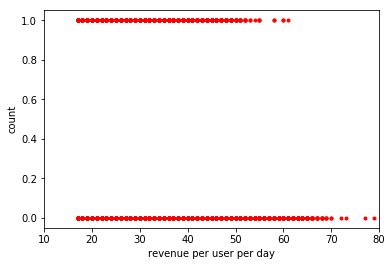

In [36]:
fig, ax = plt.subplots()
ax.plot(conversion_data.age,conversion_data.converted,'r.')
ax.set_xlim(10,80)
plt.xlabel('revenue per user per day')
plt.ylabel('count')

plt.show()

## I joined the two tables by user_id:
But in the end I didn't get around to looking at the geographic information.

In [5]:
users_1 = users.set_index('user_id')
test_results_1 = test_results.set_index('user_id')
dataset = pd.concat([test_results_1,users_1],axis = 1)

Some users are not in the users table, so the joined dataset ends up with some nans for location information.

# How much money did we make per user exposed to the website under test and control conditions? 

In [6]:
test_results_test = test_results[test_results.test == 1]
convert_rate_test = sum(test_results_test.converted)/len(test_results_test)
revenue_per_test = convert_rate_test*59
test_results_control = test_results[test_results.test == 0]
convert_rate_control =sum(test_results_control.converted)/len(test_results_control)
revenue_per_control = convert_rate_control*39
revenue_differenece = revenue_per_test-revenue_per_control

In [7]:
revenue_differenece

0.14077709526103077

We made 14 cents more per user in the test group!

# How many days should we have run the test for?

### Days from timestamps:

In [56]:
timestamp = pd.to_datetime(test_results.timestamp,errors='coerce')
test_results['time'] = timestamp
# Some if the time stamps are incorrect and will be replaced by Nans
days = timestamp - timestamp.min()
aux1 = pd.to_timedelta(days)
aux2 = aux1.apply(lambda x: x.days)
test_results['days'] = aux2

In [57]:
# Toss out records with NaN days that result from incorrect time stamps (this is about 3% of the data it is ok :-)
mask = test_results['days'].isnull()
test_results_noNat = test_results[~mask]
test_results_by_date = test_results_noNat.sort_values('timestamp')
test_results_by_date.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,days,time
166052,503836,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0,2015-03-02 00:04:12
215757,813537,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0,2015-03-02 00:04:12
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,0.0,2015-03-02 00:12:40
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,0.0,2015-03-02 00:16:25
209555,16110,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,0.0,2015-03-02 00:18:46


### Seperate the test and control groups into two datasets to calculate the cumsum:

In [58]:
test = test_results_by_date[test_results_by_date['test'] == 1]
control = test_results_by_date[test_results_by_date['test'] == 0]
# Calculate the cumsum:
test_group_converted_by_date = test['converted'].cumsum()
control_group_converted_by_date = control['converted'].cumsum()
test['cumsum'] = test_group_converted_by_date
control['cumsum'] = control_group_converted_by_date

# Number of tests by date:
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

## Converstion rates per day:

In [59]:
groups = test_results_by_date.groupby('days')
num_days = pd.unique(test_results_noNat.days)
len_df = len(num_days)

cum_table = pd.DataFrame({'tested':np.repeat(np.NaN,(len_df,)),
                          'test_converted':np.repeat(np.NaN,(len_df,)),
                          'control':np.repeat(np.NaN,(len_df,)),
                          'control_converted':np.repeat(np.NaN,(len_df,))},index = num_days.astype('int'))
cum_table_sort =  cum_table.sort_index()
for g,group in groups:
    cum_table_sort.loc[int(g),'tested'] = sum(group.test)
    cum_table_sort.loc[int(g),'control'] = len(group)-sum(group.test)
    test_converted = group[(group['test'] == 1) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'test_converted'] = sum(test_converted.converted)
    
    control_converted = group[(group['test'] == 0) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'control_converted'] = sum(control_converted.converted)


cum_table_sort['money_test_per'] = 59*cum_table_sort.test_converted/cum_table_sort.tested 
cum_table_sort['money_ctrl_per'] = 39*cum_table_sort.control_converted/cum_table_sort.control 
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
cum_table_sort.head()

,control,control_converted,test_converted,tested,money_test_per,money_ctrl_per
0,991.0,18.0,9.0,556.0,0.955036,0.708375
1,890.0,20.0,6.0,569.0,0.622144,0.876404
2,923.0,27.0,6.0,446.0,0.793722,1.140845
3,1711.0,46.0,24.0,1022.0,1.385519,1.048510
4,4476.0,80.0,41.0,2507.0,0.964898,0.697051


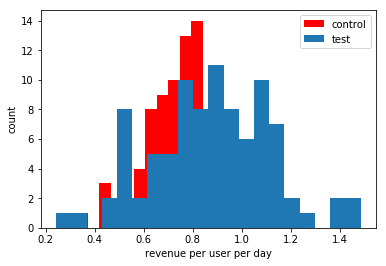

In [61]:
fig, ax = plt.subplots()
#plt.subplot(111)
ax.hist(cum_table_sort.money_ctrl_per,bins=20,color = 'r',label = 'control')
ax.hist(cum_table_sort.money_test_per,bins=20,label = 'test')
ax.legend()
plt.xlabel('revenue per user per day')
plt.ylabel('count')
plt.show()

## Calculated the revenue per user exposed, cumulatively, for each day that the test was run:

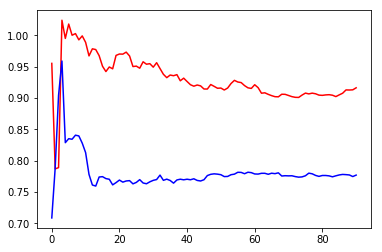

In [62]:
cum_table_sort['cum_sum_tested'] = cum_table_sort['tested'].cumsum()
cum_table_sort['cum_sum_control'] = cum_table_sort['control'].cumsum()
cum_table_sort['cum_sum_control_converted'] = cum_table_sort['control_converted'].cumsum()
cum_table_sort['cum_sum_test_converted'] = cum_table_sort['test_converted'].cumsum()
gooz_test = 59*cum_table_sort['cum_sum_test_converted']/cum_table_sort['cum_sum_tested']
gooz_control = 39*cum_table_sort['cum_sum_control_converted']/cum_table_sort['cum_sum_control']
plt.plot(gooz_test,'r')
plt.plot(gooz_control,'b')
plt.show()

# Findings from this section: 
By around 60 days the revenue per user is stable for the test and control conditions, they could have stopped there.

# Analysis of factors contributing to conversion:

In [63]:
features = test_results_by_date.copy()
features.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,days,time
166052,503836,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0,2015-03-02 00:04:12
215757,813537,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0,2015-03-02 00:04:12
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,0.0,2015-03-02 00:12:40
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,0.0,2015-03-02 00:16:25
209555,16110,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,0.0,2015-03-02 00:18:46


### Make time of day a feature:

In [65]:
hour = features.time.apply(lambda x: x.hour)
features['hour'] = hour

### Divide 'source' to seo, ads, direct, and friends referal and one-hot encode these categories: 

In [66]:
ads_mask = features.source.apply(lambda x: True if re.search('ads',x) else False)
seo_mask = features.source.apply(lambda x: True if re.search('seo',x) else False)
friend_mask = features['source'] == 'friend_referral'
direct_mask = features['source'] == 'direct_traffic'

In [67]:
seo = np.zeros((len(features),))
seo[seo_mask] = 1
features['seo'] = seo

In [68]:
ads = np.zeros((len(features),))
ads[ads_mask] = 1
features['ads'] = ads

In [69]:
direct = np.zeros((len(features),))
direct[direct_mask] = 1
features['direct'] = direct

In [70]:
friend = np.zeros((len(features),))
friend[friend_mask] = 1
features['friend'] = friend

### one-hot encode the operating system:

In [73]:
aux3 = pd.get_dummies(features.operative_system)
aux4 = pd.get_dummies(features.device)
feature = pd.concat([features,aux3,aux4],axis = 1)

In [74]:
feature.drop('timestamp',axis = 1,inplace = True)

In [75]:
feature.drop(['time','source','device','operative_system'],axis = 1,inplace = True)

### Balance the training set:

In [79]:
feature_conv = feature[feature['converted'] == 1]
feature_noconv = feature[feature['converted'] == 0]

In [80]:
feature_conv_resampled = resample(feature_conv,n_samples = len(feature_noconv))

In [81]:
feature_res = pd.concat([feature_conv_resampled,feature_noconv])

In [82]:
Xtrain = feature_res[['seo','ads','direct','friend','android','iOS','linux','mac','other','windows','mobile','web','test']]
ytrain = feature_res['converted']

In [83]:
len(feature_noconv)/len(feature_conv)

53.54252669039146

In [370]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
# from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble,metrics
from sklearn import linear_model

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

logreg = linear_model.LogisticRegression(solver = 'saga',max_iter=400)

# use a full grid over all parameters
param_grid = {"C": [1E-4,1E-3,1E-2,1E-1,1,10,100,1E3,1E4],
              "penalty": ["l1", "l2"]}

cv=StratifiedKFold(n_splits=5)
# run grid search
grid_search = GridSearchCV(logreg, param_grid=param_grid,cv=cv, n_jobs = -1, verbose = True)
start = time()

grid_search.fit(Xtrain, ytrain)


print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects

GridSearchCV took 1126.38 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 0.1, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 0.1, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 10, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 10, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 100, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 100, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1000.0, 'penalty': 'l1'}

Model with ran

In [378]:
results = grid_search.cv_results_

In [395]:
my_model = grid_search.best_estimator_

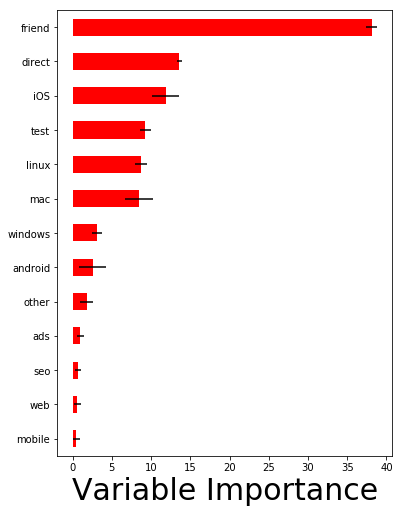

In [398]:
%matplotlib inline
std_importance = np.std([tree.feature_importances_ for tree in my_model.estimators_],axis=0)
Importance = pd.DataFrame({'Importance':my_model.feature_importances_*100,'std_importance':std_importance*100}, index=Xtrain.columns)

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize = (6,8.2), xerr = 'std_importance' )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.gca().xaxis.label.set_size(30)
plt.show()

In [394]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

clf = ensemble.RandomForestClassifier(n_estimators=20)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 10,None],
              "max_features": [3,6,13],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

cv=StratifiedKFold(n_splits=5)
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,cv=cv, n_jobs = -1, verbose = True)
start = time()
grid_search.fit(Xtrain, ytrain)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 35.2min finished


GridSearchCV took 2117.61 seconds for 324 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth':

In [382]:
for i in range(1, 4):
    candidates = np.flatnonzero(results['rank_test_score'] == i)
    for candidate in candidates:
        print("Model with rank: {0}".format(i))
        print("Mean train score: {0:.3f} (std: {1:.3f})".format(
              results['mean_train_score'][candidate],
              results['std_train_score'][candidate]))
        print("Parameters: {0}".format(results['params'][candidate]))
        print("")

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 0.1, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 0.1, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 10, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 10, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 100, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 100, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1000.0, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1000.0, 'penalty': 'l2'}

Model with rank: 1
Mean train 

In [374]:
candidates = np.flatnonzero(grid_search.cv_results_['rank_test_score'] == 1)

# Findings from this section:

Neither random forest classification nor logistic regression had more predictive accuracy than 57%. I used random forest because in sklearn logistic regression does not provide p-values and confidence intervals on regression coefficients (I could have used the statsmodels packge, but did not get around to it). The random forest model suggests that friends referral was an important determinant of conversion. Although the random forest does not speciy the direction, we can make an educated guess that it benfits conversion,.